# Data Structures and Algorithms, with Bad Apple

Creation of "Bad Apple" videos like these usually require some preprocessing of images:
- https://www.youtube.com/watch?v=p_bAnoAZVWs 
- https://www.youtube.com/watch?v=MVrNn5TuMkY

The Process is *relatively* simple:
- -> Download BadApple video from YouTube
- -> Use opencv, ffmpeg or some program to extract all the frames

From there, you get to determine what to do with each frame, to apply to your "Bad Apple" implementation

However, there are some assumptions that are left unanswered about the "Bad Apple" animation, which can leave implementations to not be as precise or neat as you would like it to be.


In this Notebook, we will be using this video, to answer some questions about the Universe of "Bad Apple" implementations:
https://www.youtube.com/watch?v=UkgK8eUdpAo 

First, let's generate some frames using FFMPEG:

In [ ]:
# Generate all the frames required for Bad Apple

!command ffmpeg -hide_banner -loglevel error -i "./video/bad_apple.webm" "./video/frames/out-%04d.png" 

In [122]:
# Import all you currently need

from PIL import Image
import numpy as np
import sys
from matplotlib import pyplot as plt

np.set_printoptions(threshold=sys.maxsize)


When we look into what each frame consists, it is basically an RBG array of pixels:

In [108]:
%matplotlib inline 

file_num = "3048"

img = Image.open(f"./video/frames/out-{file_num}.png")
arr = np.asarray(img)
arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Honestly, from here, you can flush out the Numpy array for the frames, flatten it or what not, then read into your program:

In [123]:
# A Relatively Naive Approach to Flushing the array:
with open('frame-3048.txt', 'w') as f:
    f.write(np.array2string(arr))


However, doing the above, is not only more time consuming, (1.9s a frame!), the size one file takes up is also quite ridiculous,
being at 11MB per frame! Let's attempt to shrink this size down.

One Common Assumption people make about Bad Apple's animation is that it only uses Black and White pixels for the animation, but this is proven false quite quickly with either just:
- Looking at RGB values that are not PURE BLACK (0,0,0) or PURE WHITE (255, 255, 255)
- Looking at certain other frames of the video

In [110]:
WHITE_PIXEL = np.array([255, 255, 255])
BLACK_PIXEL = np.array([0, 0, 0])

def check_pure_white_or_black(pixel):
    is_it_true = (pixel == WHITE_PIXEL).all() or (pixel == BLACK_PIXEL).all()
    if (not is_it_true):
        print(pixel)

np.apply_along_axis(check_pure_white_or_black, 2, arr)

[251 251 251]
[248 248 248]
[243 243 243]
[236 236 236]
[229 229 229]
[222 222 222]
[216 216 216]
[210 210 210]
[201 201 201]
[190 190 190]
[180 180 180]
[168 168 168]
[159 159 159]
[152 152 152]
[146 146 146]
[142 142 142]
[139 139 139]
[135 135 135]
[132 132 132]
[130 130 130]
[128 128 128]
[124 124 124]
[121 121 121]
[119 119 119]
[117 117 117]
[115 115 115]
[112 112 112]
[110 110 110]
[109 109 109]
[107 107 107]
[105 105 105]
[103 103 103]
[101 101 101]
[98 98 98]
[96 96 96]
[95 95 95]
[94 94 94]
[91 91 91]
[91 91 91]
[90 90 90]
[88 88 88]
[87 87 87]
[85 85 85]
[82 82 82]
[81 81 81]
[79 79 79]
[79 79 79]
[76 76 76]
[75 75 75]
[73 73 73]
[71 71 71]
[69 69 69]
[68 68 68]
[67 67 67]
[67 67 67]
[65 65 65]
[65 65 65]
[64 64 64]
[61 61 61]
[60 60 60]
[59 59 59]
[58 58 58]
[57 57 57]
[55 55 55]
[55 55 55]
[54 54 54]
[53 53 53]
[52 52 52]
[51 51 51]
[50 50 50]
[48 48 48]
[48 48 48]
[48 48 48]
[47 47 47]
[46 46 46]
[45 45 45]
[44 44 44]
[43 43 43]
[41 41 41]
[41 41 41]
[41 41 41]
[40 40 40]

array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ...,
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)

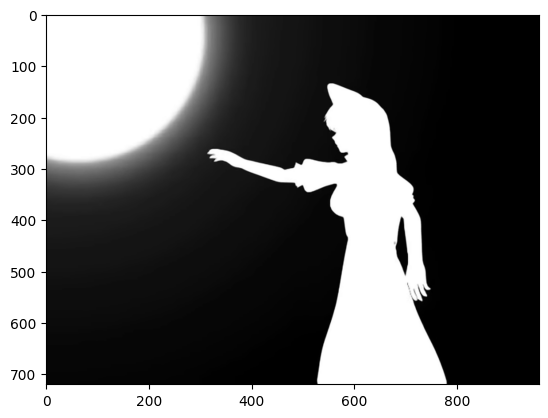

In [111]:
# Visual Inspection
plt.imshow(arr)

In [102]:
def check_same_color(pixel):
    
    pixel_first_val = pixel[0]
    all_pixels_same = (pixel == pixel_first_val).all()
    assert(all_pixels_same)

    
np.apply_along_axis(check_same_color, 2, arr)

array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ...,
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)

True